In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Miniproyecto # 2
## 2D Ising Model: Densidad de estados y función partición.

Instituto de Fı́sica. Universidad de Antioquia.

Camilo José Torres Castaño
C.c. 1036401258

# 1. Microestados y Densidad de Energía
Contar microestados para un modelo de Ising 2D donde los espines pueden estar en dos posibles estados $|↑>$ o $|↓>$

In [2]:
# Función que agrega, de uno en uno, el número de spines del sistema
def spin_throw(spinThrow_n1): # spinThrow_n1 es la lista para los spines
    spin = [-1, 1]
    # Si la primera lista está vacía, se llena con los valores de 1 y -1
    if (np.array(spinThrow_n1).size==0):
        spinThrow_n2=np.array([[i] for i in spin])
        
    # Si la primera lista no está vacía
    else:
        spinThrow_n2 = [] # La lista spinThrow_n2 se vacía
        for d in spinThrow_n1: # Se recorre cada elemento de spinThrow_n1
            for t in spin: 
                spinThrow_n2.append([*d,t]) # A cada elemento de spinThrow_n1 se le agrega un -1 y luego un 1 y
                                            # se agrega a una nueva lista.
    return spinThrow_n2

# Función que crea una matriz con todas las combinaciones de espines del sistema
def microstates(N):
    spinThrow = []
    
    for i in range(N): 
        spinThrow = spin_throw(spinThrow)
    
    return np.array(spinThrow)

## Energía
La energía se expresa según el hamiltoniano del sistema el cual considera interacciones entre espı́nes primeros vecinos (con integral de intercambio J = 1) con condiciones de frontera periódicas.


$$ \mathcal{H}=-\sum_{<k,l>} \sigma_{k}\sigma_{l}$$

In [3]:
# Para las condiciones de frontera: 
# Función que devuelve, para el microestado i-ésimo, las posiciones y cuales son los de microestados con condiciones de frontera periódicas para este 
def boundary_cond(i, L, microstates):
    N=L*L
    return (microstates[(i//L)*L+(i+1)%L], microstates[(i+L)%N],
            microstates[(i//L)*L+(i-1)%L], microstates[(i-L)%N])

In [4]:
# La energía es el negativo de la sumatoria del producto de cada microestado con los espines primeros vecinos
def energia(L, microstates):
    return -0.5*sum(microstates[i]*j
                    for i in range(L*L)
                    for j in boundary_cond(i, L, microstates)
                   )


def densidadenergia(L, microstates):
    lista_micro = []
    den_energias = [] 
    funcion_particion =[]
    dic_energias={}
    
    for estado in microstates:
        
        energia_i = energia(L,estado) # Se calcula la energia de cada microestado

        if energia_i not in dic_energias: # Se realiza el conteo de energía y determinar la degenerancia
            dic_energias[energia_i] = 0
        dic_energias[energia_i] += 1

        lista_micro.append(estado)
        den_energias.append(energia_i)

    en_items = list(dic_energias.items())
    
    energs,rept=np.array([a[0] for a in en_items]), np.array([a[1] for a in en_items])
    
    indx=np.argsort(energs) # Para organizar
    energias_final=energs[indx]   #
    degeneracion=rept[indx]

    return energias_final, degeneracion, lista_micro, den_energias

In [5]:
# función para fittear, una gaussiana con una amplitud
def func(x, mu, sigma, A):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2))

### 1.1. Microestados y densidad de energía para L = 1, N = 1x1 = 1

In [6]:
L1 = 1
N1=L1*L1
microestados1 = microstates(N1)
energia1, degeneracion1, lista_micro1,den_energias1 = densidadenergia(L1, microestados1)

Microestados para un sistema de $N = 1$ espines con la energía por microestado:

In [7]:
print(" Microestados | Energía")
for i in range(len(lista_micro1)):
    print (lista_micro1[i], "| {:>5}".format(den_energias1[i]),end=' ')
    print()

 Microestados | Energía
[-1] |  -2.0 
[1] |  -2.0 


Densidad de estados $\Omega(E)$ para N = 1.

Microestados agrupados por cantidad según el valor de la energı́a (degenerancia).

In [8]:
for i in range(len(energia1)):
    print ( "| {:>5}".format(energia1[i]),  "| {:>5}".format(degeneracion1[i]))

|  -2.0 |     2


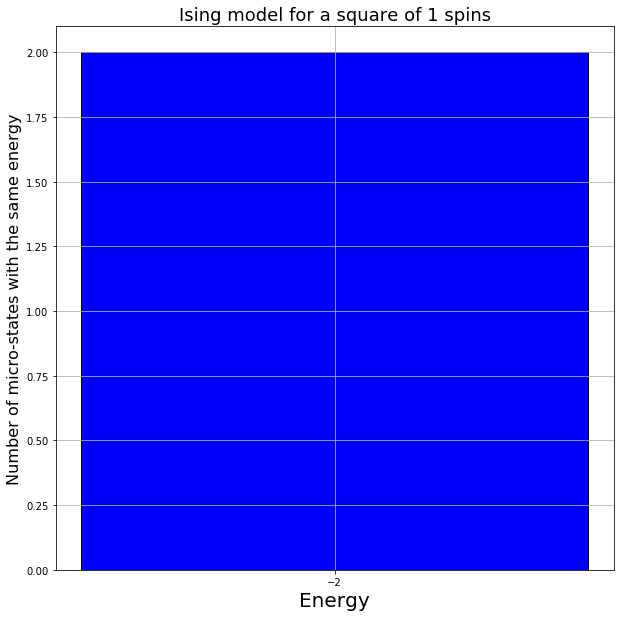

In [9]:
fig = plt.figure(figsize=(10,10))
plt.bar(energia1, degeneracion1, label='data',edgecolor = 'black',color='b')
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Number of micro-states with the same energy", fontsize=16)
plt.title("Ising model for a square of 1 spins", fontsize=18)
plt.xticks(energia1)
plt.grid()
plt.savefig("Histogram_1spins.png")
plt.show()

### 1.2. Microestados y densidad de energía para L = 2, N = 2x2 = 4

In [10]:
L2 = 2
N2=L2*L2
microestados2 = microstates(N2)
energia2, degeneracion2, lista_micro2,den_energias2 = densidadenergia(L2, microestados2)

Microestados para un sistema de $N = 4$ espines con la energía por microestado:

In [11]:
print(" Microestados | Energía")
for i in range(len(lista_micro2)):
    print (lista_micro2[i], "| {:>5}".format(den_energias2[i]),end=' ')
    print()

 Microestados | Energía
[-1 -1 -1 -1] |  -8.0 
[-1 -1 -1  1] |  -0.0 
[-1 -1  1 -1] |  -0.0 
[-1 -1  1  1] |  -0.0 
[-1  1 -1 -1] |  -0.0 
[-1  1 -1  1] |  -0.0 
[-1  1  1 -1] |   8.0 
[-1  1  1  1] |  -0.0 
[ 1 -1 -1 -1] |  -0.0 
[ 1 -1 -1  1] |   8.0 
[ 1 -1  1 -1] |  -0.0 
[ 1 -1  1  1] |  -0.0 
[ 1  1 -1 -1] |  -0.0 
[ 1  1 -1  1] |  -0.0 
[ 1  1  1 -1] |  -0.0 
[1 1 1 1] |  -8.0 


Densidad de estados $\Omega(E)$ para N = 4.

Microestados agrupados por cantidad según el valor de la energı́a (degenerancia).

In [12]:
for i in range(len(energia2)):
    print ( "| {:>5}".format(energia2[i]),  "| {:>5}".format(degeneracion2[i]))

|  -8.0 |     2
|  -0.0 |    12
|   8.0 |     2


In [13]:
standardeviation2 = np.std(den_energias2)
print("La desviación estandar para N=4 es: ",standardeviation2)

La desviación estandar para N=4 es:  4.0


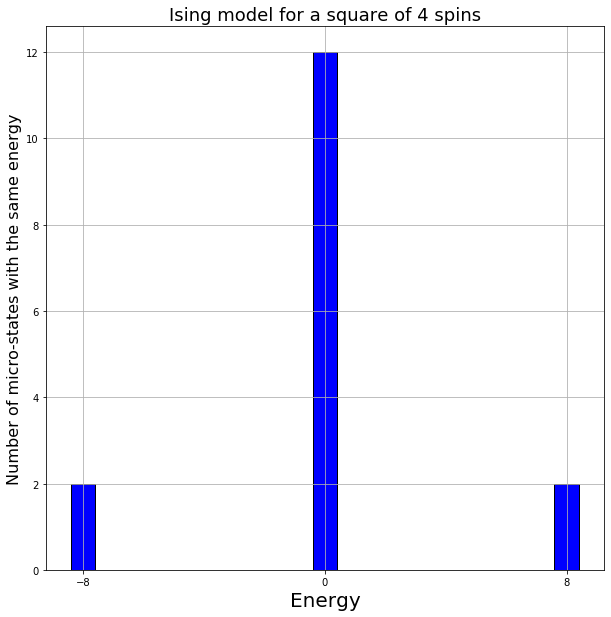

NameError: name 'popt' is not defined

In [14]:
fig = plt.figure(figsize=(10,10))
plt.bar(energia2, degeneracion2, label='data',edgecolor = 'black',color='b')
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Number of micro-states with the same energy", fontsize=16)
plt.title("Ising model for a square of 4 spins", fontsize=18)
plt.xticks(energia2)
plt.grid()
plt.savefig("Histogram_4spins.png")
plt.show()

print(popt)

### 1.3. Microestados y densidad de energía para L = 3, N = 3x3 = 9

In [ ]:
L3 = 3
N3 = L3*L3
microestados3 = microstates(N3)
energia3, degeneracion3, lista_micro3,den_energias3  = densidadenergia(L3, microestados3)

Microestados para un sistema de $N = 9$ espines con la energía por microestado. 

In [ ]:
print(" Microestados                | Energía")
for i in range(len(lista_micro3)):
    print (lista_micro3[i], "| {:>5}".format(den_energias3[i]),end=' ')
    print()

Densidad de estados $\Omega(E)$ para N = 9.

Microestados agrupados por cantidad según el valor de la energı́a (degenerancia).

In [ ]:
for i in range(len(energia3)):
    print ( "| {:>5}".format(energia3[i]),  "| {:>5}".format(degeneracion3[i]))

In [ ]:
standardeviation3=np.std(den_energias3)
print("La desviación estandar para N=9 es: ",standardeviation3)

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.bar(energia3, degeneracion3, label='data',edgecolor = 'black',color='b')
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Number of micro-states with the same energy", fontsize=16)
plt.title("Ising model for a square of 9 spins", fontsize=18)
plt.xticks(energia3)
plt.grid()
plt.savefig("Histogram_9spins.png")
plt.show()

print(popt)

### 1.4. Microestados y densidad de energía para L = 4, N = 4x4 = 16

In [ ]:
L4 = 4
N4=L4*L4
microestados4 = microstates(N4)
energia4, degeneracion4, lista_micro4,den_energias4 = densidadenergia(L4, microestados4)

Microestados para un sistema de $N = 16$ espines con la energía por microestado. 

In [ ]:
print(" Microestados                                     | Energía")
for i in range(len(lista_micro4)):
    print (lista_micro4[i], "| {:>5}".format(den_energias4[i]),end=' ')
    print()

Densidad de estados $\Omega(E)$ para N = 16.

Microestados agrupados por cantidad según el valor de la energı́a (degenerancia).

In [ ]:
for i in range(len(energia4)):
    print ( "| {:>5}".format(energia4[i]),  "| {:>5}".format(degeneracion4[i]))

In [ ]:
standardeviation4=np.std(den_energias4)
print("La desviación estandar para N=16 es: ",standardeviation4)

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.bar(energia4, degeneracion4, label='data',edgecolor = 'black',color='b')
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Number of micro-states with the same energy", fontsize=16)
plt.title("Ising model for a square of 16 spins", fontsize=18)
plt.xticks(energia4)
plt.grid()
plt.savefig("Histogram_16spins.png")
plt.show()

### 1.5. Microestados y densidad de energía para L = 5, N = 5x5 = 25

Para este valor de $L=5$ utilicé un código aparte, que lo corrí en el cluster de la universidad, debido a que con la memoria de mi computadora, usando el notebook de jupyter, el kernel se desconectaba por la necesidad de calcular $2^{5\times 5}=33554432$ microestados.

10 microestados para un sistema de $N = 16$ espines con la energía por microestado. 

<img src="micro5x5.png">

Densidad de estados $\Omega(E)$ para N = 25.

Microestados agrupados por cantidad según el valor de la energı́a (degenerancia).

<img src="den25.png">

La desviación estandar para N=25 es:

<img src="desv25.png">

<img src="plots/Histogram_N25spins2.png">

# 2. Función partición canónica
Con base en lo anterior demuestre la equivalencia entre la suma sobre estados de la función partición canónica y la suma sobre energı́as para un N dado y tres valores de $\beta$ tomando $k_{B} = 1$ con $T =2, \ 2.5,\ 3$.

$$Z(\beta)=\sum_{\sigma}e^{-\beta E(\sigma)}=\sum_{E}\Omega(E)\ e^{-\beta E} $$


In [ ]:
# Para calcular la función partición.
# Con la suma sobre las energias y sobre los microestados.

def funcionParticion(Temperature,degeneracion,energias,lista_micro, den_energias):
    k = 1
    funcpart_energ = []
    funcpart_micro = []
    
    for temp in Temperature:
        func_energ = sum(degeneracion*np.exp(-energias/(k*temp))) #Para k=1, con una temperatura dada, hace la suma sobre todas las energías
        func_micro = 0
        
        for i in range(len(lista_micro)):   # Para k=1, con una temperatura dada, hace la suma sobre todos los microestados
            E = den_energias[i]  # Energía de cada microestado            
            func_micro = func_micro + np.exp(-E/(k*temp))

        funcpart_energ.append(func_energ)
        funcpart_micro.append(func_micro)

    return funcpart_energ, funcpart_micro

In [ ]:
Temp = [2, 2.5, 3, 5] # Temperatura

funcpart2 = funcionParticion(Temp, degeneracion2, energia2, lista_micro2, den_energias2)
funcpart3 = funcionParticion(Temp, degeneracion3, energia3, lista_micro3, den_energias3)
funcpart4 = funcionParticion(Temp, degeneracion4, energia4, lista_micro4, den_energias4)

print("Función Partición Canónica para N = 4")
print("---------------------------------------------------------------------")
print("|Temperatura (K)| Suma sobre energías     | Suma sobre microestados |")
print("---------------------------------------------------------------------")
for i in range(len(Temp)):
    print("|      {:<3}      | Z = {:<18}  | Z = {:<18}  |".format(Temp[i],funcpart2[0][i],funcpart2[1][i]))
    print("---------------------------------------------------------------------")
    
print("\nFunción Partición Canónica para N = 9")
print("---------------------------------------------------------------------")
print("|Temperatura (K)| Suma sobre energías     | Suma sobre microestados |")
print("---------------------------------------------------------------------")
for i in range(len(Temp)):
    print("|      {:<3}      | Z = {:<18}  | Z = {:<18}  |".format(Temp[i],funcpart3[0][i],funcpart3[1][i]))
    print("---------------------------------------------------------------------")

print("\nFunción Partición Canónica para N = 16")
print("---------------------------------------------------------------------")
print("|Temperatura (K)| Suma sobre energías     | Suma sobre microestados |")
print("---------------------------------------------------------------------")
for i in range(len(Temp)):
    print("|      {:<3}      | Z = {:<18}  | Z = {:<18}  |".format(Temp[i],funcpart4[0][i],funcpart4[1][i]))
    print("---------------------------------------------------------------------")

## 2.1. Energía media
Para N = 4 × 4, haga un barrido sobre un amplio rango de valores de $\beta$, para obtener una gráfica de $<E>$ en función de $T$ , usando $<E> = −\partial lnZ/\partial \beta$. ¿Qué concluye?

$$ <E>  = - \frac{\partial lnZ(\beta)}{\partial \beta}=- \frac{1}{Z(\beta)} \frac{\partial Z(\beta)}{\partial \beta}=\frac{\sum_{E}E\ \Omega(E)\ e^{-\beta E}}{\sum_{E}\Omega(E)\ e^{-\beta E}}$$

In [ ]:
def energiamedia(Temperature, energias, degeneracion,Z):    
    E_prom  = [] # Energía media
    E2_prom = [] # Energía cuadrada media
    sumaEner, sumaEner2 = 0,0
    i=0
    for temp in Temperature:
        sumaEner = sum(energias*degeneracion*np.exp(-energias/temp)) # Se hace -dZ/dB
        e_prom = sumaEner/Z[i]                                          # Se divide entre la función partición 
        
        sumaEner2 = sum(energias**2*degeneracion*np.exp(-energias/temp))
        e2_prom = sumaEner2/Z[i] 
        
        #print("sum",sumaEner2)
        #print("Z",Z[i])
        E_prom.append(e_prom)
        #print("Epro",e_prom)
        E2_prom.append(e2_prom)
        #print(e2_prom)
        i+=1
    
    E_prom = np.array(E_prom)
    E2_prom = np.array(E2_prom)
        
    return E_prom, E2_prom

In [ ]:
Temp = np.linspace(0.1,30.0,300)

# Calcular la energía media para N=2x2
funcpart2 = funcionParticion(Temp, degeneracion2, energia2, lista_micro2, den_energias2)
EnergiaMedia2 = energiamedia(Temp, energia2, degeneracion2, funcpart2[0])

# Calcular la energía media para N=3x3
funcpart3 = funcionParticion(Temp, degeneracion3, energia3, lista_micro3, den_energias3)
EnergiaMedia3 = energiamedia(Temp, energia3, degeneracion3, funcpart3[0])

# Calcular la energía media para N=4x4
funcpart4 = funcionParticion(Temp, degeneracion4, energia4, lista_micro4, den_energias4)
EnergiaMedia4 = energiamedia(Temp, energia4, degeneracion4, funcpart4[0])

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(Temp,EnergiaMedia2[0],"b",label="N=2x2")
plt.plot(Temp,EnergiaMedia3[0],"m",label="N=3x3")
plt.plot(Temp,EnergiaMedia4[0],"r",label="N=4x4")
plt.xlabel("Temperature T(K)", fontsize=20)
plt.ylabel("Average energy <E>", fontsize=20)
plt.title("Average energy in function of temperature", fontsize=20)
plt.legend()
plt.grid()
plt.show()

Primero, se puede observar que la energía media del sistema siempre es negativa. Entre mayor sea el número de espines en el sistema la energía media a $T=0\ K$ es cada vez más baja. Finalmente, y más importante, la energía media sube rápidamente y cuanto la temperatura $T$ tiende a infinito la energía media del sistema tiende asintóticamente a cero.

Gráfica calculada en el cluster de la universidad.

<img src="plots/AvarageEnergy2.png">

# 3. Calor especı́fico
Demuestre teóricamente la siguiente expresión del calor especı́fico (a partir de su definición termodinámica) y de la definición de promedios en el ensamble canónico:

$$c_{v}=\frac{\beta^{2}}{N}\ \left(<E^{2}>-<E>^{2}\right)$$

e impleméntela en su programa para obtener curvas del calor especı́fico en función de la temperatura.

### Demostración:

Tomando la función de distribución de probabilidad como la función partición canónica de la forma:

$$Z\left( \beta \right) = \sum_{\sigma}e^{-\beta E_{\sigma}}$$


La energía media:

$$<E>=\frac{\sum_{\sigma}E_{\sigma}e^{-\beta E_{\sigma}}}{\sum_{\sigma}e^{-\beta E_{\sigma}}} 
= \frac{1}{Z}\sum_{\sigma}E_{\sigma}e^{-\beta E_{\sigma}}
= \frac{-1}{Z}\sum_{\sigma}\frac{\partial}{\partial \beta}e^{-\beta E_{\sigma}} 
= \frac{-1}{Z}\frac{\partial}{\partial \beta} \sum_{\sigma}e^{-\beta E_{\sigma}}
= \frac{-1}{Z}\frac{\partial Z}{\partial \beta} $$


$$<E>=- \frac{\partial lnZ}{\partial \beta}$$

La energía cuadrada media:

$$<E^{2}>=\frac{\sum_{\sigma}E_{\sigma}^{2}e^{-\beta E_{\sigma}}}{\sum_{\sigma}e^{-\beta E_{\sigma}}} 
= \frac{1}{Z}\sum_{\sigma}\frac{\partial^{2}}{\partial \beta^{2}}e^{-\beta E_{\sigma}} 
= \frac{1}{Z}\frac{\partial^{2}}{\partial \beta^{2}}\sum_{\sigma}e^{-\beta E_{\sigma}}$$
$$<E^{2}> = \frac{1}{Z}\frac{\partial^{2} Z}{\partial \beta^{2}} $$

Sumando y restando el término:

$$<E^{2}> = \frac{1}{Z}\frac{\partial^{2} Z}{\partial \beta^{2}} + \left(\frac{1}{Z}\frac{\partial Z}{\partial \beta}  \right)^{2}-\left(\frac{1}{Z}\frac{\partial Z}{\partial \beta}  \right)^{2}$$

Restando:

$$<E^{2}> - <E>^{2} = \frac{1}{Z}\frac{\partial^{2} Z}{\partial \beta^{2}} - \left(\frac{1}{Z}\frac{\partial Z}{\partial \beta}  \right)^{2}
= \frac{\partial }{\partial \beta}\left(\frac{1}{Z} \frac{\partial Z}{\partial \beta} \right)
= -\frac{\partial }{\partial \beta}<E>
= -\frac{\partial <E>}{\partial \beta}$$

Como: 

$$U=<E>\ \ \rightarrow \ \ C_{v}=\frac{\partial <E>}{\partial \beta}=\frac{\partial U}{\partial \beta}$$

y:

$$\beta = \frac{1}{k_{B}T} \ , \ \ k_{B}=1 \ \ \rightarrow\ \ = \frac{\partial T}{\partial \beta}=-T^{2}$$ 

Reemplazando:

$$<E^{2}> - <E>^{2}=T^{2}C_{v}$$

$$C_{v}=\beta^{2}<E^{2}> - <E>^{2}$$

Finalmente, dividiendo entre $N$ a ambos lados:

$$c_{v}=\frac{\beta^{2}}{N} \left( <E^{2}> - <E>^{2}\right)$$


In [ ]:
def calorespecifico(N,Temperatures,EnergiaMedia):         
    CalorEsp=[]
    jj = 0

    for t in range(len(EnergiaMedia[1])):
        c_v = (EnergiaMedia[1][t]-(EnergiaMedia[0][t])**2)/(N*(Temperatures[t]**2)) # Se calcula el calor específico para una lista
        CalorEsp.append(c_v)                                        # de energías medias previamente calculadas con 
                                                                    # un linspace de temperaturas, que también se 
    return CalorEsp                                                 # debe usar en esta función.

In [ ]:
Temp = np.linspace(0.1,10.0,200)

# Calcular la energía media para N=2x2
funcpart2 = funcionParticion(Temp, degeneracion2, energia2, lista_micro2, den_energias2)
EnergiaMedia2 = energiamedia(Temp, energia2, degeneracion2, funcpart2[0])
cv2 = calorespecifico(N2,Temp, EnergiaMedia2)

# Calcular la energía media para N=3x3
funcpart3 = funcionParticion(Temp, degeneracion3, energia3, lista_micro3, den_energias3)
EnergiaMedia3 = energiamedia(Temp, energia3, degeneracion3, funcpart3[0])
cv3 = calorespecifico(N3,Temp, EnergiaMedia3)

# Calcular la energía media para N=4x4
funcpart4 = funcionParticion(Temp, degeneracion4, energia4, lista_micro4, den_energias4)
EnergiaMedia4 = energiamedia(Temp, energia4, degeneracion4, funcpart4[0])
cv4 = calorespecifico(N4,Temp, EnergiaMedia4)

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(Temp,cv4,"b",label="N=4x4")
plt.plot(Temp,cv3,"r",label="N=3x3")
plt.plot(Temp,cv2,"m",label="N=2x2")
plt.xlabel("Temperature $T(K)$", fontsize=20)
plt.ylabel("Specific heat capacity $c_{v}$", fontsize=20)
plt.title("Specific heat capacity in function of Temperature", fontsize=16)
plt.legend()
plt.xlim(0,10)
plt.grid()
plt.show()

In [ ]:
print("Temperatura de Curie Tc(L).\n")
print("Para L = 2, Tc(2) = {} K".format(Temp[cv2.index(max(cv2))]))
print("Para L = 3, Tc(3) = {} K".format(Temp[cv3.index(max(cv3))]))
print("Para L = 4, Tc(4) = {} K".format(Temp[cv4.index(max(cv4))]))

Gráfica calculada en el cluster de la universidad.

<img src="plots/SpecificHeat2.png">

## DESVIACIÓN ESTANDAR

Calculados con el código diseñado para correr en el cluster de la Universidad.

In [ ]:
DesvStd = [4.0, 4.242640687119285, 5.656854249492381, 7.0710678118654755]

## TIEMPO DE CÓMPUTO

Calculados con el código diseñado para correr en el cluster de la Universidad.

In [ ]:
N_list = [4, 9, 16, 25]
tiempos = [0.22282966692000628, 0.4161024559289217, 30.853339622030035, 17629.112718727905]

In [ ]:
def func(x, A, B, C,a):
    return A+B*x+C*np.exp(a*x)

In [ ]:
popt, pcov = curve_fit(func, N_list, tiempos,bounds=(-np.inf,np.inf),p0=[0,1,10000,10])

In [ ]:
print(popt)

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,64),func(np.linspace(0,64),*popt),label="fit curve")
plt.plot(N_list[0],tiempos[0],'ro',label="N=2x2")
plt.plot(N_list[1],tiempos[1],'go',label="N=3x3")
plt.plot(N_list[2],tiempos[2],'mo',label="N=4x4")
plt.plot(N_list[3],tiempos[3],'go',label="N=5x5")
plt.plot(64,func(64,*popt),'yo',label="N=8x8")
plt.xlabel("Number of spins $N$", fontsize=20)
plt.ylabel("Comput time t(s)", fontsize=20)
plt.title("Compute study", fontsize=16)
plt.savefig("time.png")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("Para N=8x8=64, el tiempo que se demoraría el código es de",func(64,*popt),"s")
print("Osea 2.5e+258 años!")